In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
import sys

In [5]:
! {sys.executable} -m pip install citipy

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=865ca963f97a87cb8d75e5560c84efe9


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ballina
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 1 | meulaboh
Processing Record 5 of Set 1 | terre haute
Processing Record 6 of Set 1 | namibe
Processing Record 7 of Set 1 | saldanha
Processing Record 8 of Set 1 | khuzhir
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | yulara
Processing Record 15 of Set 1 | husavik
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | lensk
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | champerico
Processing Record 21 of Set 1 | zhigansk
Processing Record 22 of Set 1 | oranjemund
Pr

Processing Record 39 of Set 4 | marsa matruh
Processing Record 40 of Set 4 | carnarvon
Processing Record 41 of Set 4 | hermanus
Processing Record 42 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 43 of Set 4 | jalingo
Processing Record 44 of Set 4 | itaituba
Processing Record 45 of Set 4 | jalu
Processing Record 46 of Set 4 | east london
Processing Record 47 of Set 4 | san patricio
Processing Record 48 of Set 4 | bethel
Processing Record 49 of Set 4 | machico
Processing Record 50 of Set 4 | bisira
Processing Record 1 of Set 5 | baykit
Processing Record 2 of Set 5 | acapulco
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 5 | saint-pierre
Processing Record 5 of Set 5 | poronaysk
Processing Record 6 of Set 5 | ust-ilimsk
Processing Record 7 of Set 5 | marsh harbour
Processing Record 8 of Set 5 | urumqi
Processing Record 9 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 5 | yining
Processi

Processing Record 27 of Set 8 | la ronge
Processing Record 28 of Set 8 | maghama
City not found. Skipping...
Processing Record 29 of Set 8 | meadow lake
Processing Record 30 of Set 8 | kamariotissa
Processing Record 31 of Set 8 | qianjiang
Processing Record 32 of Set 8 | cabedelo
Processing Record 33 of Set 8 | utiroa
City not found. Skipping...
Processing Record 34 of Set 8 | fort nelson
Processing Record 35 of Set 8 | ust-uda
Processing Record 36 of Set 8 | kilis
Processing Record 37 of Set 8 | tangara
Processing Record 38 of Set 8 | miraflores
Processing Record 39 of Set 8 | hambantota
Processing Record 40 of Set 8 | santiago
Processing Record 41 of Set 8 | almenara
Processing Record 42 of Set 8 | riyadh
Processing Record 43 of Set 8 | bathsheba
Processing Record 44 of Set 8 | cabo san lucas
Processing Record 45 of Set 8 | caceres
Processing Record 46 of Set 8 | alta floresta
Processing Record 47 of Set 8 | batticaloa
Processing Record 48 of Set 8 | sibu
Processing Record 49 of Set 

Processing Record 12 of Set 12 | high rock
Processing Record 13 of Set 12 | lucea
Processing Record 14 of Set 12 | batetskiy
Processing Record 15 of Set 12 | merauke
Processing Record 16 of Set 12 | rocha
Processing Record 17 of Set 12 | kaeo
Processing Record 18 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 19 of Set 12 | amboasary
Processing Record 20 of Set 12 | pacific grove
Processing Record 21 of Set 12 | plastun
Processing Record 22 of Set 12 | port lincoln
Processing Record 23 of Set 12 | lewistown
Processing Record 24 of Set 12 | grindavik
Processing Record 25 of Set 12 | beitbridge
Processing Record 26 of Set 12 | udachnyy
Processing Record 27 of Set 12 | yuxia
Processing Record 28 of Set 12 | aljezur
Processing Record 29 of Set 12 | pafos
Processing Record 30 of Set 12 | rabo de peixe
Processing Record 31 of Set 12 | chake chake
Processing Record 32 of Set 12 | brae
Processing Record 33 of Set 12 | kruisfontein
Processing Record 34 of Set 12 | cerrito
Pr

In [15]:
print(len(city_data))

570


In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ballina,-28.87,153.57,78.80,74,79,5.82,AU,2020-02-20 23:26:00
1,Jamestown,42.10,-79.24,23.00,66,90,9.17,US,2020-02-20 23:22:40
2,Meulaboh,4.14,96.13,79.81,79,0,11.01,ID,2020-02-20 23:26:01
3,Terre Haute,39.47,-87.41,32.00,42,1,11.41,US,2020-02-20 23:26:01
4,Namibe,-15.20,12.15,75.47,73,70,16.11,AO,2020-02-20 23:26:01
5,Saldanha,-33.01,17.94,64.40,77,0,4.70,ZA,2020-02-20 23:26:01
6,Khuzhir,53.19,107.34,15.17,90,98,11.52,RU,2020-02-20 23:26:01
7,Airai,-8.93,125.41,73.26,80,87,1.36,TL,2020-02-20 23:26:02
8,Bredasdorp,-34.53,20.04,62.01,87,13,4.70,ZA,2020-02-20 23:26:02
9,Busselton,-33.65,115.33,71.01,34,85,15.14,AU,2020-02-20 23:26:02


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ballina,AU,2020-02-20 23:26:00,-28.87,153.57,78.80,74,79,5.82
1,Jamestown,US,2020-02-20 23:22:40,42.10,-79.24,23.00,66,90,9.17
2,Meulaboh,ID,2020-02-20 23:26:01,4.14,96.13,79.81,79,0,11.01
3,Terre Haute,US,2020-02-20 23:26:01,39.47,-87.41,32.00,42,1,11.41
4,Namibe,AO,2020-02-20 23:26:01,-15.20,12.15,75.47,73,70,16.11
5,Saldanha,ZA,2020-02-20 23:26:01,-33.01,17.94,64.40,77,0,4.70
6,Khuzhir,RU,2020-02-20 23:26:01,53.19,107.34,15.17,90,98,11.52
7,Airai,TL,2020-02-20 23:26:02,-8.93,125.41,73.26,80,87,1.36
8,Bredasdorp,ZA,2020-02-20 23:26:02,-34.53,20.04,62.01,87,13,4.70
9,Busselton,AU,2020-02-20 23:26:02,-33.65,115.33,71.01,34,85,15.14


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/20/20'

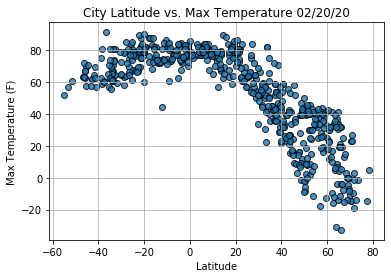

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

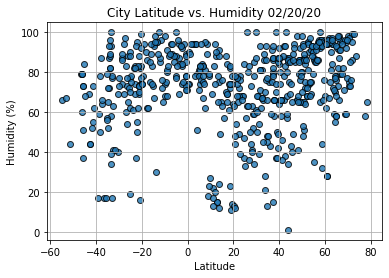

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

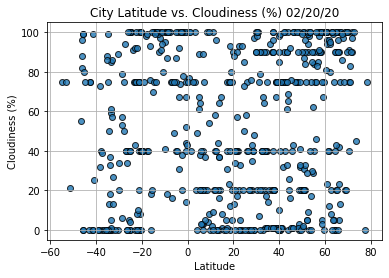

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

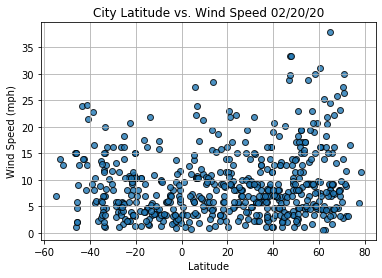

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()